## Задание:  
Необходимо построить скориниговую модель, оценивающую вероятность дефолта клиента на стадии заведения кредитной заявки. А также ответить на следующие вопросы:  
1. Какая доля 1 в выборке "accept"?
2. Необходимо рассчитать для всех интервальных переменных следующее:
  - Доля пропущенных значений 
  - Медиана
  - Среднее
  - Среднеквадратическое отклонение
  - Есть ли аномальные значения, выбросы? 
  - Information Value
3. Необходимо рассчитать для всех категориальных переменных следующее:
  - Мода
  - Доля пропущенных значений
  - Information Value
  - Есть ли выбросы, аномальные значений
4. Построить логистическую регрессию только на одобренных заявках с преобразованными переменными WoE. Какое значение GINI? F1 мера?
5. Провести анализ Reject Inference. Какая доля отказанных заявок? 
6. Построить логистическую регрессию на всех заявках с преобразованными переменными WoE. Какое значение GINI, F1? Изменилась ли модель? 
7. Какую модель вы рекомендуете для внедрения в продуктивную среду? Дать развернутое пояснение

  
### Ответы на вопросы
**Вопрос 1.** В выборке acept доля 1 составляет 2.14%  

**ACEPT ВЫБОРКА**  
**Вопрос 2.** Доля пропущенных значений, медиана, среднее, среднеквадратичное отклоенение, распределение на данных для численных значений:
<img src="нумерик нули.jpg">  
<img src="нумерик распределение.jpg">  
Аномальные значения были - их я обрезала просто по правилу все значения в таблице должны быть больше или равны 0. Плюс избавилась от заработка более 7 миллионов.     
  
Information Value для числовых переменных:  
income = 0.001  
CNT_MNTH_FROM_LAST_PMNT = 0.1  
age = 0.251  
experience = 0.102  
count_mnth_act_passport = 0.282  
  
**Вопрос 3.** Доля пропущенных значений, мода, распределение на данных для категориальных значений:
<img src="категории нуль.jpg" style='width:400px;'>  
<img src="категории распределение.jpg" style='width:600px;'>  
Аномальные значения были - их я обрезала просто по правилу все значения в таблице должны быть больше или равны 0  
  
Information Value для категориальных переменных:  
INCOME_TYPE = 0.04  
EDUCATION_ = 0.048  
CUSTOMER_CATEGORY_ = 0.47  
DEPENDANT_NUMBER = 0.003  
IS_EMPL = 0.713  
COUNT_ACTIVE_CREDIT_NO_CC = 0.133  
inquiry_14_day = 0.063  
inquiry_21_day = 0.101  
is_CACNC_nan = 0.08  
is_CMFLP_nan = 0.053  
is_i14_nan = 0.06  
is_i21_nan = 0.06  
  
**REJECT ВЫБОРКА**  
**Вопрос 2.** Доля пропущенных значений, медиана, среднее, среднеквадратичное отклоенение, распределение на данных для численных значений:
<img src="реджект нули.jpg">  
<img src="реджект распр.jpg">  
Аномальные значения были - их я обрезала просто по правилу все значения в таблице должны быть больше или равны 0  
  
**Вопрос 3.** Доля пропущенных значений, мода, распределение на данных для категориальных значений:
<img src="реджект нули кат.jpg" style='width:400px;'>  
<img src="реджект распр кат.jpg" style='width:600px;'>  
Аномальные значения были - их я обрезала просто по правилу все значения в таблице должны быть больше или равны 0  

**МОДЕЛЬ**  
**Вопрос 4.** Логистическая регрессия на acept дала следующие значения:  
Точность на acept: 0.926  
Критерий Джини: 0.262  
F1-мера: 0.138   
  
**Вопрос 5.** Доля отказанных заявок после Reject Inference анализа: 1.78%  
  
**Вопрос 6.** Логистическая регрессия на acept и reject дала следующие значения:    
Точность на acept: 0.924  
Критерий Джини: 0.397  
F1-мера: 0.198  
  
**Вопрос 7.** В результате модель, построенная на acept и reject заявках, стала даже лучше предсказывать результаты.  
**Вывод**: Данная задача сильно отличается от тех, что мы брали в курсе машинного обучения. Вероятнее всего она более прибижена к реальности, когда данные неоднородные, нерепрезентативные, с аномальными значениями. Мне кажется, что лучше брать вторую модель, так как в ней за счет присутствия и выборки acept и выборки reject будет более репрезентативная выборка и как видно более точные предсказания.

Сначала загрузим файлы и посмотрим на данные, находящиеся в них

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

acept = pd.read_csv('./15_accept.csv')
reject = pd.read_csv('./15_reject.csv')
acept.head()


,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
0,0,OTHER,elementary,NaN,140000.0,0.0,0,0.0,34.218548,38.497103,4.060109,NaN,NaN,10.056007,7
1,0,2NDFL,elementary,NaN,56245.0,0.0,0,NaN,NaN,50.567123,2.131507,NaN,NaN,5.536986,10
2,0,OTHER,elementary,Corporate,119510.0,0.0,1,1.0,1.115569,28.191781,2.032877,1.0,1.0,8.109589,11
3,0,OTHER,advanced,Corporate,21611.0,0.0,1,NaN,NaN,33.333446,1.711528,NaN,NaN,7.972678,15
4,0,OTHER,elementary,Corporate,102915.0,0.0,1,2.0,1.174485,54.064219,1.458739,0.0,0.0,8.888876,21


In [2]:
acept = acept.drop(columns='UID')
reject = reject.drop(columns='UID')

Посмотрим на долю таргета в данных accept

In [3]:
targets = acept.target.value_counts() / acept.shape[0]
print(f'Доля 1 в accept: {round(targets[1]*100, 2)}%\nДоля 0 в accept: {round(targets[0]*100, 2)}%\n')


Доля 1 в accept: 2.14%
Доля 0 в accept: 97.86%



## Accept выборка

Разделим характеристики на численные и категориальные. Посмотрим на описание всех числовых признаков (кол-во нулевых значений, пропущенных, среднее, медиана и т.д.) и на распределение данных по каждому признаку

In [4]:
columns_types = reject.dtypes
numeric = []
categorical = []
for i in reject.columns:
    if columns_types[i] == 'object':
        categorical.append(i)
    else:
        numeric.append(i)

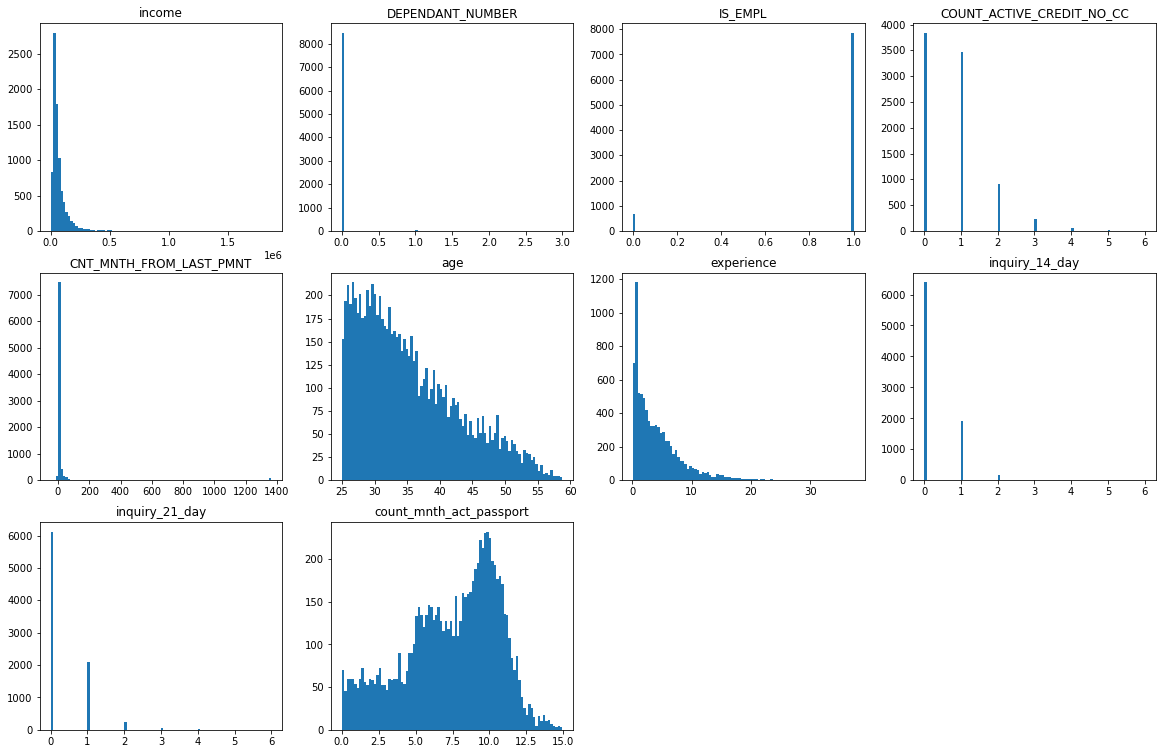

,Уникальные,Пустые,Тип,Нулевые,Среднее,Медиана,Среднее отклонение,Минимум,Максимум
income,56.417% (18366),2.163% (704),float64,0.009% (3),61419.175,41649.5,93884.183,0.0,11450378.0
DEPENDANT_NUMBER,0.018% (6),0.12% (39),float64,99.306% (32328),0.008,0.0,0.111,0.0,4.0
IS_EMPL,0.006% (2),0.0% (0),int64,60.625% (19736),0.394,0.0,0.489,0,1
COUNT_ACTIVE_CREDIT_NO_CC,0.031% (10),25.659% (8353),float64,37.415% (12180),0.666,0.0,0.829,0.0,8.0
CNT_MNTH_FROM_LAST_PMNT,53.311% (17355),30.989% (10088),float64,0.068% (22),18.68,0.926,133.134,-66.135,1365.277
age,74.765% (24339),0.0% (0),float64,0.0% (0),36.471,34.768,8.185,25.0,58.899
experience,65.55% (21339),0.151% (49),float64,0.003% (1),4.852,3.231,5.227,0.0,101.192
inquiry_14_day,0.025% (8),28.101% (9148),float64,50.295% (16373),0.357,0.0,0.611,0.0,6.0
inquiry_21_day,0.031% (10),28.101% (9148),float64,47.644% (15510),0.42,0.0,0.685,0.0,8.0
count_mnth_act_passport,65.033% (21171),0.0% (0),float64,0.012% (4),7.243,7.787,3.346,-0.019,15.616


In [5]:
column_info = pd.DataFrame(index=numeric)
n = acept.shape[0]
for i in numeric:
    uniques = acept[i].unique().shape[0]
    column_info.at[i, 'Уникальные'] = f'{round(uniques*100/n, 3)}% ({int(uniques)})'
    
    nulls = acept[i].isna().sum()
    column_info.at[i, 'Пустые'] = f'{round(nulls*100/n, 3)}% ({int(nulls)})'
    
    column_info.at[i, 'Тип'] = acept[i].dtype
    
    zeros = acept[acept[i] == 0].shape[0]
    column_info.at[i, 'Нулевые'] = f'{round(zeros*100/n, 3)}% ({int(zeros)})'
    column_info.at[i, 'Среднее'] = f'{str(round(acept[i].mean(), 3))}'
    column_info.at[i, 'Медиана'] = f'{str(round(acept[i].median(), 3))}'
    column_info.at[i, 'Среднее отклонение'] =  f'{str(round(acept[i].std(), 3))}'
    column_info.at[i, 'Минимум'] = f'{str(round(acept[i].min(), 3))}'
    column_info.at[i, 'Максимум'] = f'{str(round(acept[i].max(), 3))}'
    
plt.figure(figsize=(20,13))

for i in range(len(numeric)):
    ax = plt.subplot(3, 4, i + 1)
    buf=acept.dropna()[numeric[i]]
    ax.hist(buf, bins=int(90))
    ax.set_title(str(numeric[i]))

plt.show()

column_info


Кажется есть аномалии по некоторым переменным. В переменных обрежем данные по 0 (так по логике все данные должны быть >=0)  Плюс уберем людей с зарабатком в месяц более 7 миллионов, звучит неправдоподобно и далее мы увидим, что такая выборка нам и не нужна

На категориях DEPENDANT_NUMBER, experience и income пропуски составляют менее 3% от всех данных, поэтому удалим такие строки в acept  
Для остальных категорий кол-во пропусков велико, поэтому сделаем как было предложено на семинаре - заполним все средним значением и введем новую характеристику, показывающую было ли то или иное значение Nan'ом или нет.  

In [6]:
# Удалить в acept строки с пропусками DEPENDANT_NUMBER, experience и income
# Добавить новые категории показывающие была ли переменная наном
# Заменить пропуски в остальных категориях на среднее
acept = acept[acept['DEPENDANT_NUMBER'].notna() & acept['experience'].notna() & acept['income'].notna()]

acept['is_CACNC_nan'] = acept['COUNT_ACTIVE_CREDIT_NO_CC'].isna()
acept['is_CMFLP_nan'] = acept['CNT_MNTH_FROM_LAST_PMNT'].isna()
acept['is_i14_nan'] = acept['inquiry_14_day'].isna()
acept['is_i21_nan'] = acept['inquiry_21_day'].isna()

acept['COUNT_ACTIVE_CREDIT_NO_CC'] = acept['COUNT_ACTIVE_CREDIT_NO_CC'].fillna(round(acept['COUNT_ACTIVE_CREDIT_NO_CC'].std()))
acept['CNT_MNTH_FROM_LAST_PMNT'] = acept['CNT_MNTH_FROM_LAST_PMNT'].fillna(acept['CNT_MNTH_FROM_LAST_PMNT'].std())
acept['inquiry_14_day'] = acept['inquiry_14_day'].fillna(round(acept['inquiry_14_day'].std()))
acept['inquiry_21_day'] = acept['inquiry_21_day'].fillna(round(acept['inquiry_21_day'].std()))

for i in numeric:
    acept = acept[acept[i] >= 0]
    
acept = acept[acept['income'] <= 7000000]

Теперь посмотрим, что происходит с категориальными переменными

,Пустые,Мода
INCOME_TYPE,0.0% (0),OTHER
EDUCATION_,0.0% (0),elementary
CUSTOMER_CATEGORY_,58.569% (18358),Corporate


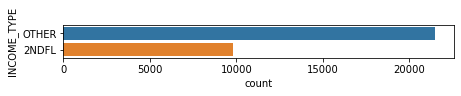

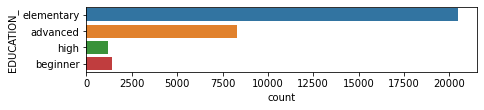

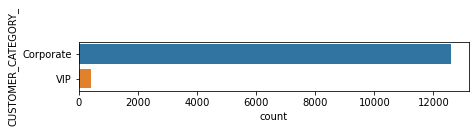

In [7]:
column_info = pd.DataFrame(index=categorical)
n = acept.shape[0]
for i in categorical:
    nulls = acept[i].isna().sum()
    column_info.at[i, 'Пустые'] = f'{round(nulls*100/n, 3)}% ({int(nulls)})'
    column_info.at[i, 'Мода'] = f'{acept[i].mode()[0]}'

for i in categorical:
    plt.figure(figsize=(7, acept[i].unique().shape[0]*0.3))
    sns.countplot(y = i, data = pd.DataFrame(acept[i]))

column_info


Много пропущенных значений на категории CUSTOMER_CATEGORY_ (почти половина) - заменим на новую категорию 'unknown'  

In [8]:
acept['CUSTOMER_CATEGORY_'] = acept['CUSTOMER_CATEGORY_'].fillna('unknown')

## Reject выборка  
Теперь изучим данные на reject выборке

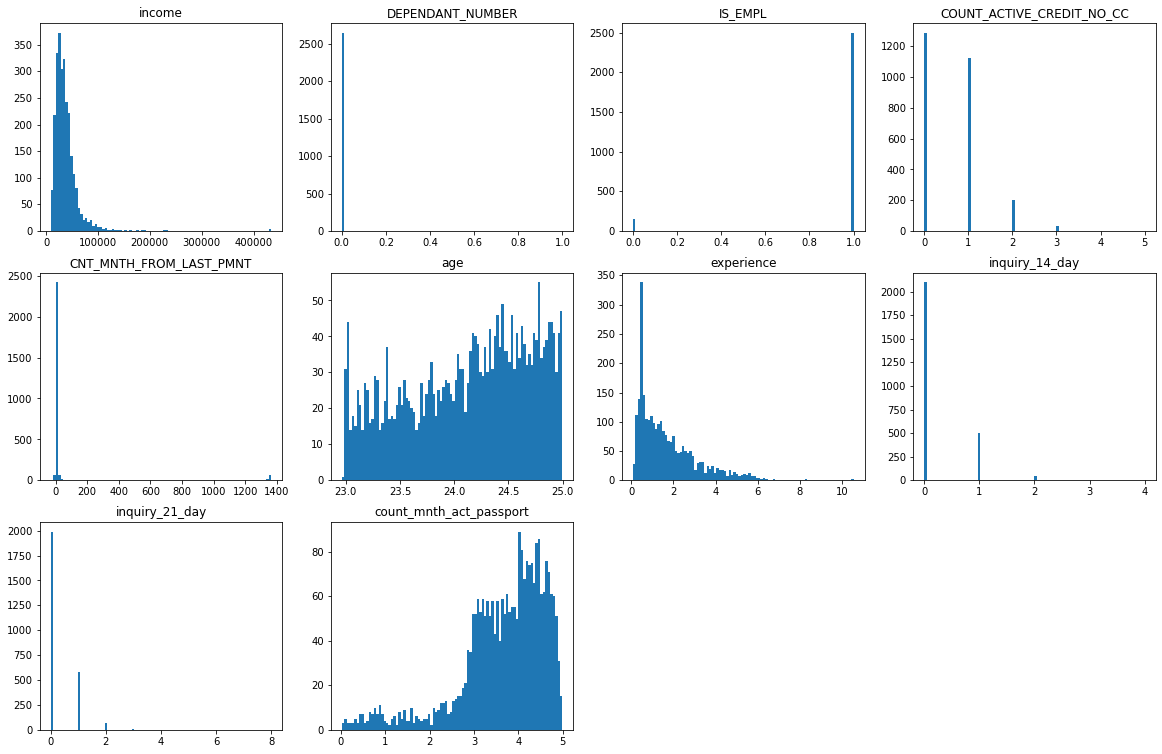

,Уникальные,Пустые,Тип,Нулевые,Среднее,Медиана,Среднее отклонение,Минимум,Максимум
income,71.589% (7655),5.106% (546),float64,0.037% (4),33651.243,29115.0,21821.838,0.0,434136.0
DEPENDANT_NUMBER,0.037% (4),0.047% (5),float64,99.794% (10671),0.002,0.0,0.046,0.0,2.0
IS_EMPL,0.019% (2),0.0% (0),int64,45.675% (4884),0.543,1.0,0.498,0,1
COUNT_ACTIVE_CREDIT_NO_CC,0.075% (8),41.223% (4408),float64,33.218% (3552),0.541,0.0,0.731,0.0,6.0
CNT_MNTH_FROM_LAST_PMNT,40.802% (4363),51.127% (5467),float64,0.028% (3),42.478,0.865,228.832,-31.073,1364.633
age,52.735% (5639),0.0% (0),float64,0.0% (0),24.037,24.109,0.738,0.003,25.0
experience,71.402% (7635),0.075% (8),float64,0.0% (0),1.66,1.226,1.394,0.025,15.271
inquiry_14_day,0.075% (8),43.056% (4604),float64,41.148% (4400),0.341,0.0,0.62,0.0,6.0
inquiry_21_day,0.084% (9),43.056% (4604),float64,38.633% (4131),0.414,0.0,0.708,0.0,8.0
count_mnth_act_passport,56.13% (6002),0.0% (0),float64,0.0% (0),3.509,3.713,1.154,0.003,43.099


In [9]:
column_info = pd.DataFrame(index=numeric)
n = reject.shape[0]
for i in numeric:
    uniques = reject[i].unique().shape[0]
    column_info.at[i, 'Уникальные'] = f'{round(uniques*100/n, 3)}% ({int(uniques)})'
    
    nulls = reject[i].isna().sum()
    column_info.at[i, 'Пустые'] = f'{round(nulls*100/n, 3)}% ({int(nulls)})'
    
    column_info.at[i, 'Тип'] = reject[i].dtype
    
    zeros = reject[reject[i] == 0].shape[0]
    column_info.at[i, 'Нулевые'] = f'{round(zeros*100/n, 3)}% ({int(zeros)})'
    column_info.at[i, 'Среднее'] = f'{str(round(reject[i].mean(), 3))}'
    column_info.at[i, 'Медиана'] = f'{str(round(reject[i].median(), 3))}'
    column_info.at[i, 'Среднее отклонение'] =  f'{str(round(reject[i].std(), 3))}'
    column_info.at[i, 'Минимум'] = f'{str(round(reject[i].min(), 3))}'
    column_info.at[i, 'Максимум'] = f'{str(round(reject[i].max(), 3))}'
    
plt.figure(figsize=(20,13))

for i in range(len(numeric)):
    ax = plt.subplot(3, 4, i + 1)
    buf=reject.dropna()[numeric[i]]
    ax.hist(buf, bins=int(90))
    ax.set_title(str(numeric[i]))

plt.show()

column_info

На категориях DEPENDANT_NUMBER, experience и income пропуски составляют менее 6% от всех данных, удалять данные строки не хотелось бы, так как для reject нам нужно предсказание. Заменим на среднее значение по всей выборке, тем более как видим выборка состоит из определенного класса клиентов  
На оставшихся переменных пропусков около половины, поэтому заменим на среднее  
Также заметим, что данная выборка сильно отличается от acept. Например здесь, в отличие от acept, возраст до 25 лет.

In [10]:
for i in numeric:
    reject = reject[reject[i] >= 0]

reject['DEPENDANT_NUMBER'] = reject['DEPENDANT_NUMBER'].fillna(0.0)
reject['experience'] = reject['experience'].fillna(acept['experience'].std())
reject['income'] = reject['income'].fillna(round(acept['income'].std()))

reject['is_CACNC_nan'] = reject['COUNT_ACTIVE_CREDIT_NO_CC'].isna()
reject['is_CMFLP_nan'] = reject['CNT_MNTH_FROM_LAST_PMNT'].isna()
reject['is_i14_nan'] = reject['inquiry_14_day'].isna()
reject['is_i21_nan'] = reject['inquiry_21_day'].isna()

reject['COUNT_ACTIVE_CREDIT_NO_CC'] = reject['COUNT_ACTIVE_CREDIT_NO_CC'].fillna(round(reject['COUNT_ACTIVE_CREDIT_NO_CC'].std()))
reject['CNT_MNTH_FROM_LAST_PMNT'] = reject['CNT_MNTH_FROM_LAST_PMNT'].fillna(reject['CNT_MNTH_FROM_LAST_PMNT'].std())
reject['inquiry_14_day'] = reject['inquiry_14_day'].fillna(round(reject['inquiry_14_day'].std()))
reject['inquiry_21_day'] = reject['inquiry_21_day'].fillna(round(reject['inquiry_21_day'].std()))


Что происходит с категориальными переменными?

,Пустые,Мода
INCOME_TYPE,0.0% (0),OTHER
EDUCATION_,0.0% (0),elementary
CUSTOMER_CATEGORY_,44.225% (2041),Corporate


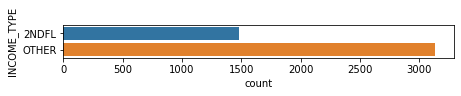

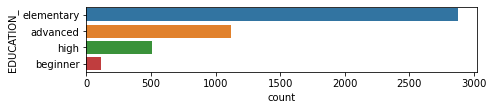

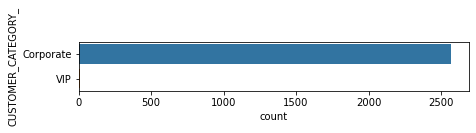

In [11]:
column_info = pd.DataFrame(index=categorical)
n = reject.shape[0]
for i in categorical:
    nulls = reject[i].isna().sum()
    column_info.at[i, 'Пустые'] = f'{round(nulls*100/n, 3)}% ({int(nulls)})'
    column_info.at[i, 'Мода'] = f'{reject[i].mode()[0]}'
    
for i in categorical:
    plt.figure(figsize=(7, reject[i].unique().shape[0]*0.3))
    sns.countplot(y = i, data = pd.DataFrame(reject[i]))

column_info

Много пустых значений в CUSTOMER_CATEGORY_ заменим на новую категорию 'unknown'  
Заметим, что на rejecte практически нет VIP клиентов, наблюдается бОльшая однородность, чем на acept по остальным категориям.

In [12]:
# Заполняем пропуски новой категорией unknown
reject['CUSTOMER_CATEGORY_'] = reject['CUSTOMER_CATEGORY_'].fillna('unknown')


## WoE и IV рассчет  
Теперь проведем рассчет WoE и IV переменных. Для этого разделим переменные на woe_categorical и на woe_numeric - на первых woe будет расчитываться просто по каждой категории, а на вторых мы подберем разделение на бины  
Также не забудем, что WoE строится не на всей выборке, поэтому возьмем 40%  

In [13]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [14]:
woe_categorical = np.append(categorical, ['DEPENDANT_NUMBER', 'IS_EMPL', 'COUNT_ACTIVE_CREDIT_NO_CC', 'inquiry_14_day', 
                                          'inquiry_21_day', 'is_CACNC_nan', 'is_CMFLP_nan', 'is_i14_nan', 'is_i21_nan'],
                            axis=0)
woe_numeric = ['income', 'CNT_MNTH_FROM_LAST_PMNT', 'age', 'experience', 'count_mnth_act_passport']

WOE = []

train, woe_data = train_test_split(acept, shuffle=True, test_size=0.5, random_state=42)

n_1 = woe_data[woe_data.target == 1].shape[0]
n_0 = woe_data[woe_data.target == 0].shape[0]
IV = {}

# Categorical
print('\tInformation Value for acept')
for var in woe_categorical: 
    val_freq_1 = woe_data[woe_data['target'] == 1][var].value_counts() / n_1
    val_freq_0 = woe_data[woe_data['target'] == 0][var].value_counts() / n_0
    buf = pd.DataFrame({'0':val_freq_0, '1':val_freq_1}).fillna(0)
    val_freq_0, val_freq_1 = buf['0'], buf['1']
    
    woe = np.log(val_freq_0) - np.log(val_freq_1)
    woe = woe.replace({-np.inf:0 , np.inf:0})

    
    acept[f'woe_{var}'] = acept[var].replace(dict(woe))
    reject[f'woe_{var}'] = reject[var].replace(dict(woe))

    IV[var] = sum((val_freq_0 * woe - val_freq_1 * woe))
    print(f'{var} = {round(IV[var],3)}')
    
    WOE.append(f'woe_{var}')


# Numeric
nbins = 100
for var in woe_numeric:
    max_val = max(train[var].max(), woe_data[var].max()) + 1
    min_val = min(train[var].min(), woe_data[var].min())
    for i in range(nbins):
        left = min_val + ((max_val - min_val) / nbins) * i
        right = min_val + ((max_val - min_val) / nbins) * (i+1)
        woe_data.loc[(left <= woe_data[var]) & (woe_data[var] < right), 'bin'] = int(i)
        acept.loc[(left <= acept[var]) & (acept[var] < right), 'bin'] = int(i)
        reject.loc[(left <= reject[var]) & (reject[var] < right), 'bin'] = int(i)


    buf = pd.DataFrame(columns=['val0', 'val1', 'woe'])
    buf['val0'] = woe_data[woe_data['target'] == 0]['bin'].value_counts() / n_0 * 100 
    buf['val1'] = woe_data[woe_data['target'] == 1]['bin'].value_counts() / n_1 * 100
    buf = buf.fillna(0)
    buf['woe'] = np.log(buf.val0 / buf.val1)
    buf = buf.replace({-np.inf:0, np.inf:0})

    
    if acept.bin.unique().shape[0] >= 6:
        buf = buf.sort_values(by=['woe'])
        buf['new_bin'] = np.copy(buf['woe'].loc[:])
        l = buf['woe'].iloc[0]
        step = 0.4
        new_bin = 0
        for i in range(buf.shape[0]):
            r = buf.iloc[i]['woe']
            if abs(r-l) > step:
                new_bin += 1
                l = r
            buf['new_bin'].iloc[i] = new_bin
        buf['woe'].loc[:] = buf['new_bin'].loc[:].replace(dict(np.log(buf.groupby(['new_bin'])['val0'].sum() / 
                                                                      buf.groupby(['new_bin'])['val1'].sum())))
        buf = buf.replace({-np.inf:0, np.inf:0})

        
        acept['bin'].loc[:] = acept['bin'].loc[:].replace(dict(buf.new_bin))
        reject['bin'].loc[:] = reject['bin'].loc[:].replace(dict(buf.new_bin))
    
    acept[f'woe_{var}'] = acept['bin'].replace(dict(buf.woe))
    reject[f'woe_{var}'] = reject['bin'].replace(dict(buf.woe))
    
    IV[var] = sum((buf.val0 - buf.val1) * buf.woe)/100
    print(f'{var} = {round(IV[var], 3)}')
    WOE.append(f'woe_{var}')

WOE.append('target')

	Information Value for acept
INCOME_TYPE = 0.038
EDUCATION_ = 0.053
CUSTOMER_CATEGORY_ = 0.5
DEPENDANT_NUMBER = 0.002
IS_EMPL = 0.692
COUNT_ACTIVE_CREDIT_NO_CC = 0.131
inquiry_14_day = 0.079
inquiry_21_day = 0.11
is_CACNC_nan = 0.06
is_CMFLP_nan = 0.041


C:\Users\Evik\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


is_i14_nan = 0.045
is_i21_nan = 0.045
income = 0.027
CNT_MNTH_FROM_LAST_PMNT = 0.1
age = 0.236
experience = 0.09
count_mnth_act_passport = 0.331


## Логистическая регрессия для acept  


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

woe_acept = acept[WOE]

train, test = train_test_split(woe_acept, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(train.drop(columns='target'), train.target)
threshold = 0.94
pred = (clf.predict_proba(test.drop(columns='target'))[:, 0] < threshold).astype(int)
# pred = clf.predict(test.drop(columns='target'))

y = test.target
score = sum(y == pred) / pred.shape[0]
gini = 2 * roc_auc_score(y, pred) - 1
f1 = f1_score(y, pred)
print(f'Точность на acept: {round(score,3)}\nКритерий Джини: {round(gini, 3)}\nF1-мера: {round(f1,3)}')


Точность на acept: 0.926
Критерий Джини: 0.262
F1-мера: 0.138


## Reject Inference    
Буду использовать Hard Cut технику  


In [17]:
woe_reject = reject[WOE[:-1]]
pred = (clf.predict_proba(woe_reject)[:, 0] < threshold).astype(int)
reject['target'] = pred
targets = reject.target.value_counts() / reject.shape[0]
print(f'Доля 1 в accept: {round(targets[1]*100, 2)}%\nДоля 0 в accept: {round(targets[0]*100, 2)}%\n')

Доля 1 в accept: 1.78%
Доля 0 в accept: 98.22%



## Логистическая регрессия для acept и reject



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

woe_reject['target'] = pred
new_data = pd.concat([woe_acept, woe_reject])

train, test = train_test_split(new_data, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(train.drop(columns='target'), train.target)
pred = (clf.predict_proba(test.drop(columns='target'))[:, 0] < threshold).astype(int)


y = test.target
score = sum(y == pred) / pred.shape[0]
gini = 2 * roc_auc_score(y, pred) - 1
f1 = f1_score(y, pred)
print(f'Точность на acept: {round(score,3)}\nКритерий Джини: {round(gini, 3)}\nF1-мера: {round(f1,3)}')


Точность на acept: 0.924
Критерий Джини: 0.397
F1-мера: 0.198


В результате модель, построенная на acept и reject заявках, стала даже лучше предсказывать результаты.  
  
**Вывод:** Данная задача сильно отличается от тех, что мы брали в курсе машинного обучения. Вероятнее всего она более прибижена к реальности, когда данные неоднородные, нерепрезентативные, с аномальными значениями. Мне кажется, что лучше брать вторую модель, так как в ней за счет присутствия и выборки acept и выборки reject будет более репрезентативная выборка и как видно более точные предсказания.